In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('finish')

finish


In [3]:
import numpy as np
import pandas as pd
import cv2
from glob import glob

In [4]:
images_path='/content/flickr8k-sau/Flickr_Data/Images/'
images = glob(images_path+'*.jpg')
len(images)

8091

In [5]:
images[:5]

['/content/flickr8k-sau/Flickr_Data/Images/3084011664_76d37c6559.jpg',
 '/content/flickr8k-sau/Flickr_Data/Images/3227423095_5049951eab.jpg',
 '/content/flickr8k-sau/Flickr_Data/Images/918886676_3323fb2a01.jpg',
 '/content/flickr8k-sau/Flickr_Data/Images/2346402952_e47d0065b6.jpg',
 '/content/flickr8k-sau/Flickr_Data/Images/540604040_bec822c144.jpg']

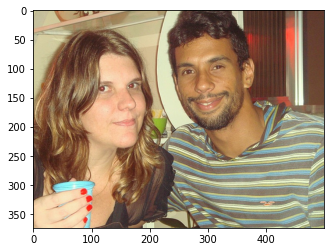

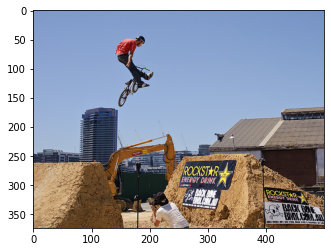

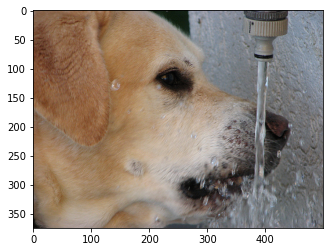

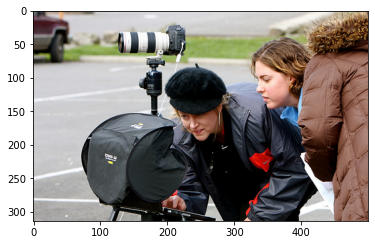

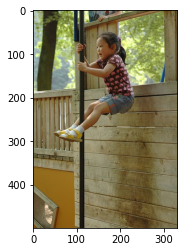

In [6]:
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50

incept_model = ResNet50(include_top=True)

In [8]:
incept_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [9]:
from keras.models import Model
last=incept_model.layers[-2].output
modele=Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [10]:
images_features ={}
count = 0
for i in images:
  img = cv2.imread(i)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = cv2.resize(img,(224,224))

  img = img.reshape(1,224,224,3)
  pred = modele.predict(img).reshape(2048,)

  img_name = i.split('/')[-1]

  images_features[img_name] = pred

  count += 1

  if count > 1499:
    break
  elif count % 50 == 0:
    print(count)




50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450


In [11]:
caption_path = '/content/flickr8k-sau/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'


In [12]:
captions  = open(caption_path,'rb').read().decode('utf-8').split('\n')

In [13]:
captions

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .',
 '1002674143_1b742ab4b8.jpg#0\tA little girl covered in paint sits in front of a pai

In [14]:
captions_dict = {}
for i in captions:
  try:
    img_name = i.split('\t')[0][:-2]
    caption = i.split('\t')[1]
    if img_name in images_features:
      if img_name not in captions_dict:
        captions_dict[img_name] = [caption]

      else:
        captions_dict[img_name].append(caption)
  except:
    pass

In [15]:
captions_dict

{'1002674143_1b742ab4b8.jpg': ['A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .',
  'A little girl is sitting in front of a large painted rainbow .',
  'A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .',
  'There is a girl with pigtails sitting in front of a rainbow painting .',
  'Young girl with pigtails painting outside in the grass .'],
 '1007320043_627395c3d8.jpg': ['A child playing on a rope net .',
  'A little girl climbing on red roping .',
  'A little girl in pink climbs a rope bridge at the park .',
  'A small child grips onto the red ropes at the playground .',
  'The small child climbs on a red ropes on a playground .'],
 '1015584366_dfcec3c85a.jpg': ['A black dog leaps over a log .',
  'A grey dog is leaping over a fallen tree .',
  'A large black dog leaps a fallen log .',
  'A mottled black and grey dog in a blue collar jumping over a fallen tree .',
  'The black dog jumped th

In [16]:
def preprocessed(txt):
  modified = txt.lower()
  modified = 'startofseq' + modified + 'endofseq'
  return modified

In [17]:
for k,v in captions_dict.items():
  for vv in v:
    captions_dict[k][v.index(vv)] = preprocessed(vv)

In [18]:
count_words = {}
count = 1
for k,vv in captions_dict.items():
  for v in vv:
    for word in v.split():
      if word not in count_words:
        count_words[word] = count
        count += 1 

In [19]:
count_words

{'startofseqa': 1,
 'little': 2,
 'girl': 3,
 'covered': 4,
 'in': 5,
 'paint': 6,
 'sits': 7,
 'front': 8,
 'of': 9,
 'a': 10,
 'painted': 11,
 'rainbow': 12,
 'with': 13,
 'her': 14,
 'hands': 15,
 'bowl': 16,
 '.endofseq': 17,
 'is': 18,
 'sitting': 19,
 'large': 20,
 'small': 21,
 'the': 22,
 'grass': 23,
 'plays': 24,
 'fingerpaints': 25,
 'white': 26,
 'canvas': 27,
 'on': 28,
 'it': 29,
 'startofseqthere': 30,
 'pigtails': 31,
 'painting': 32,
 'startofseqyoung': 33,
 'outside': 34,
 'child': 35,
 'playing': 36,
 'rope': 37,
 'net': 38,
 'climbing': 39,
 'red': 40,
 'roping': 41,
 'pink': 42,
 'climbs': 43,
 'bridge': 44,
 'at': 45,
 'park': 46,
 'grips': 47,
 'onto': 48,
 'ropes': 49,
 'playground': 50,
 'startofseqthe': 51,
 'black': 52,
 'dog': 53,
 'leaps': 54,
 'over': 55,
 'log': 56,
 'grey': 57,
 'leaping': 58,
 'fallen': 59,
 'tree': 60,
 'mottled': 61,
 'and': 62,
 'blue': 63,
 'collar': 64,
 'jumping': 65,
 'jumped': 66,
 'stump': 67,
 'boy': 68,
 'stick': 69,
 'kneeli

In [20]:
for k,vv in captions_dict.items():
  for v in vv:
    encoded = []
    for word in v.split():
     
        encoded.append(count_words[word])

    captions_dict[k][vv.index(v)] = encoded   

In [21]:
captions_dict

{'1002674143_1b742ab4b8.jpg': [[1,
   2,
   3,
   4,
   5,
   6,
   7,
   5,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   5,
   10,
   16,
   17],
  [1, 2, 3, 18, 19, 5, 8, 9, 10, 20, 11, 12, 17],
  [1,
   21,
   3,
   5,
   22,
   23,
   24,
   13,
   25,
   5,
   8,
   9,
   10,
   26,
   27,
   13,
   10,
   12,
   28,
   29,
   17],
  [30, 18, 10, 3, 13, 31, 19, 5, 8, 9, 10, 12, 32, 17],
  [33, 3, 13, 31, 32, 34, 5, 22, 23, 17]],
 '1007320043_627395c3d8.jpg': [[1, 35, 36, 28, 10, 37, 38, 17],
  [1, 2, 3, 39, 28, 40, 41, 17],
  [1, 2, 3, 5, 42, 43, 10, 37, 44, 45, 22, 46, 17],
  [1, 21, 35, 47, 48, 22, 40, 49, 45, 22, 50, 17],
  [51, 21, 35, 43, 28, 10, 40, 49, 28, 10, 50, 17]],
 '1015584366_dfcec3c85a.jpg': [[1, 52, 53, 54, 55, 10, 56, 17],
  [1, 57, 53, 18, 58, 55, 10, 59, 60, 17],
  [1, 20, 52, 53, 54, 10, 59, 56, 17],
  [1, 61, 52, 62, 57, 53, 5, 10, 63, 64, 65, 55, 10, 59, 60, 17],
  [51, 52, 53, 66, 22, 60, 67, 17]],
 '103106960_e8a41d64f8.jpg': [[1, 68, 13, 10, 69

In [22]:

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing .sequence import pad_sequences

In [23]:
MAX_LEN = 0
for k,vv in captions_dict.items():
  for v in vv:
    if len(v) > MAX_LEN:
      MAX_LEN = len(v)
      print(v)

[1, 2, 3, 4, 5, 6, 7, 5, 8, 9, 10, 11, 12, 13, 14, 15, 5, 10, 16, 17]
[1, 21, 3, 5, 22, 23, 24, 13, 25, 5, 8, 9, 10, 26, 27, 13, 10, 12, 28, 29, 17]
[1, 68, 5, 63, 168, 169, 164, 134, 10, 150, 165, 166, 10, 170, 167, 13, 171, 172, 173, 5, 22, 145, 17]
[577, 3, 18, 128, 10, 578, 28, 280, 329, 579, 121, 122, 3, 92, 28, 22, 579, 13, 149, 84, 5, 22, 473, 17]
[1, 140, 5, 280, 151, 216, 62, 446, 18, 933, 28, 10, 312, 110, 121, 10, 436, 140, 5, 10, 40, 73, 92, 237, 238, 14, 28, 22, 110, 934, 14, 935, 936]


In [24]:
MAX_LEN

33

In [25]:
VOCAB_SIZE = len(count_words)

def generator(photo,caption):
    n_samples = 0

    X = []
    y_in = []
    y_out = []

    for k, vv in caption.items():
      for v in vv:
        for i in range(1, len(v)):
          X.append(photo[k])

          in_seq = [v[:i]]
          out_seq = v[i]
          #in_seq[1,2,45]---->[1,2,45,000,0,0,0,0,.....40]

          in_seq = pad_sequences(in_seq,maxlen=MAX_LEN,padding='post',truncating='post')[0]
          out_seq = to_categorical([out_seq],num_classes=VOCAB_SIZE+1)[0]

          y_in.append(in_seq)
          y_out.append(out_seq)

    return X,y_in,y_out

In [26]:
X,y_in,y_out =generator(images_features,captions_dict)

In [27]:
len(X),len(y_in),len(y_out)

(81501, 81501, 81501)

In [28]:
X = np.array(X)
y_in = np.array(y_in,dtype='float64')
y_out = np.array(y_out,dtype='float64')

In [29]:
X.shape,y_in.shape,y_out.shape

((81501, 2048), (81501, 33), (81501, 4515))

In [30]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers.merge import add
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Flatten,Input,Convolution2D,Dropout,LSTM,TimeDistributed,Embedding,Bidirectional,Activation,RepeatVector,Concatenate
from tensorflow.keras.models import Sequential,Model

In [31]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(count_words) + 1

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,),activation='relu'))

image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256,return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output,language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x= Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input],outputs = out)

#model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy',optimizer='RMSprop', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               262272    
                                                                 
 repeat_vector (RepeatVector  (None, 33, 128)          0         
 )                                                               
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 33, 128)           577920    
                                                                 
 lstm (LSTM)                 (None, 33, 256)           394240    
                            

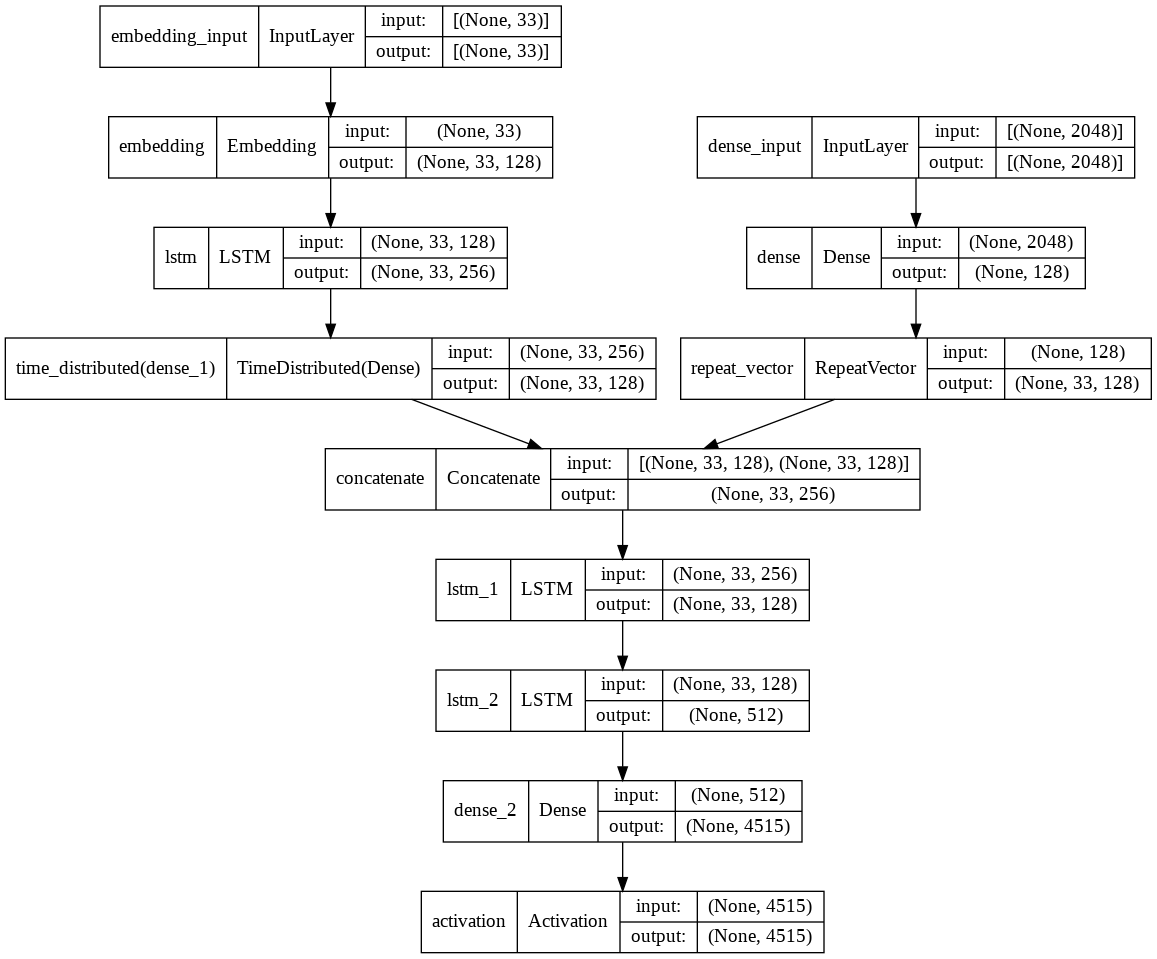

In [32]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [1]:
model.fit([X,y_in],y_out,batch_size=512,epochs=80)

NameError: ignored

In [ ]:
inv_dict = {v:k for k, v in count_words.items()}

In [ ]:
model.save('model.h5')

In [ ]:
model.save_weights('mine_model_weights.h5')

In [ ]:
np.save('vocab.npy',count_words )

In [ ]:
def getImage(x):

  test_img_path = images[x]

  test_img = cv2.imread(test_img_path)
  test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)

  test_img = cv2.resize(test_img,(224,224))

  test_img = np.reshape(test_img,(1,224,224,3))

  return test_img

In [ ]:
test_feature = modele.predict(getImage(2478)).reshape(1,2048)

In [ ]:
test_feature

In [ ]:
test_img_path = images[2478]
test_img = cv2.imread(test_img_path)
test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [ ]:
print(count_words)

In [ ]:
text_inp = ['startofseqa']

count=0
caption=''
while count < 25:
  count += 1

  encoded = []
  for i in text_inp:
    encoded.append(count_words[i])

  encoded = [encoded]

  encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)

  prediction = np.argmax(model.predict([test_feature,encoded]))

  sampled_word = inv_dict[prediction]

  caption = caption +' '+ sampled_word

  if sampled_word == 'endofseq':
    break

  text_inp.append(sampled_word)


  


In [ ]:
caption